In [1]:
import pickle
import numpy as np

In [6]:
with open('UPDATED_NLP_COURSE\\06-Deep-Learning\\train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [5]:
with open('UPDATED_NLP_COURSE\\06-Deep-Learning\\test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [7]:
type(train_data)

list

In [8]:
type(test_data)

list

In [9]:
len(train_data)

10000

In [10]:
len(test_data)

1000

In [11]:
train_data[1]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
 'no')

In [12]:
# Setting the vocablary containing every word from train and test data

In [13]:
all_data = train_data+test_data

In [15]:
vocab = set()

for story,ques,ans in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(ques))
    
vocab.add('no')
vocab.add('yes')

In [16]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [17]:
vocab_len = len(vocab)+1

In [18]:
# Longest story
all_story_len = [len(data[0]) for data in all_data] # all_data is a tuple...we are taking 1st element of that tuple
# i.e question and saving the length of the question

In [21]:
all_story_len[:5] # length of the first five question

[12, 26, 39, 52, 64]

In [25]:
max_story_len = max(all_story_len)

max_story_len

156

In [23]:
all_ques_len = [len(data[1]) for data in all_data]

all_ques_len[:5]

[6, 6, 6, 6, 6]

In [26]:
max_ques_len = max(all_ques_len)

max_ques_len

6

In [29]:
# Toeknization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [30]:
tokenizer = Tokenizer(filters=[])

tokenizer.fit_on_texts(vocab)

In [33]:
tokenizer.word_index

{'there': 1,
 'yes': 2,
 'grabbed': 3,
 'put': 4,
 'mary': 5,
 'john': 6,
 'picked': 7,
 'milk': 8,
 'left': 9,
 'hallway': 10,
 'in': 11,
 'dropped': 12,
 'went': 13,
 'travelled': 14,
 'office': 15,
 'took': 16,
 'discarded': 17,
 'kitchen': 18,
 'journeyed': 19,
 'bathroom': 20,
 'daniel': 21,
 '.': 22,
 'garden': 23,
 'to': 24,
 'the': 25,
 'up': 26,
 'football': 27,
 'moved': 28,
 'back': 29,
 'sandra': 30,
 'got': 31,
 '?': 32,
 'no': 33,
 'bedroom': 34,
 'is': 35,
 'down': 36,
 'apple': 37}

In [34]:
train_story_text = []
train_ques_text = []
train_answers = []

In [35]:
for story,ques,answers in train_data:
    train_story_text.append(story)
    train_ques_text.append(ques)
    train_answers.append(answers)

In [36]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [37]:
len(train_story_seq)

10000

In [42]:
# function to padd the stories
def vectorize_stories(data,word_index = tokenizer.word_index,max_story_len = max_story_len,max_ques_len = max_ques_len):
    
    #stories
    X = []
    #questions
    Q = []
    #answers
    Y = []
    
    for story,ques,answer in data:
        
        # for each story
        x = [word_index[word.lower()] for word in story]
        
        # for each ques
        q = [word_index[word.lower()] for word in ques]
        
        y = np.zeros(len(word_index)+1)
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Q.append(q)
        Y.append(y)
        
    return (pad_sequences(X,maxlen = max_story_len),pad_sequences(Q,maxlen=max_ques_len),np.array(Y))
        

In [43]:
inputs_train,ques_train,answers_train = vectorize_stories(train_data)

In [48]:
inputs_test,ques_test,answers_test = vectorize_stories(test_data)

In [45]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [49]:
inputs_test

array([[ 0,  0,  0, ..., 25, 34, 22],
       [ 0,  0,  0, ..., 25, 23, 22],
       [ 0,  0,  0, ..., 25, 23, 22],
       ...,
       [ 0,  0,  0, ..., 25, 37, 22],
       [ 0,  0,  0, ..., 25, 23, 22],
       [ 0,  0,  0, ..., 37,  1, 22]])

In [50]:
sum(answers_test)

array([  0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
       503.,   0.,   0.,   0.,   0.])

In [51]:
sum(answers_train)

array([   0.,    0., 5012.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0., 4988.,    0.,    0.,
          0.,    0.])

In [52]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [72]:
# place holder shape = (max_story_len,batch_size)
input_seq = Input((max_story_len,))
ques_seq = Input((max_ques_len,))

In [73]:
#vocab_len
vocab_size = len(vocab)+1

In [74]:
# Input encoder M

input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# OUTPUT
# (samples,story_maxlen,embedding_dim)

In [75]:
# Input encoder C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_ques_len))
input_encoder_c.add(Dropout(0.3))

# OUTPUT
# (samples,story_maxlen,max_ques_len)

In [76]:
# Question encoder 
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_size,output_dim=64,input_length = max_ques_len))
question_encoder.add(Dropout(0.3))

# OUTPUT
# (samples,ques_maxlen,embedding_dim)

In [77]:
# ENCODED <----- ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_seq)

input_encoded_c = input_encoder_c(input_seq)

question_encoded = question_encoder(ques_seq)

In [78]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [79]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [80]:
answer=concatenate([response,question_encoded])

In [81]:
answer # every step is performed as per the paper End-to-End Memory Networks

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_1')>

In [82]:
answer = LSTM(32)(answer)


In [83]:
answer =Dropout(0.5)(answer)

In [84]:
answer = Dense(vocab_size)(answer) # (sample,vocab_size) YES/NO

In [85]:
answer = Activation('softmax')(answer)

In [87]:
model = Model([input_seq,ques_seq],answer)

In [88]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [89]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_6 (Sequential)       (None, None, 64)     2432        input_3[0][0]                    
__________________________________________________________________________________________________
sequential_8 (Sequential)       (None, 6, 64)        2432        input_4[0][0]                    
______________________________________________________________________________________________

In [91]:
model.fit([inputs_train,ques_train],answers_train,batch_size=32,epochs = 100,validation_data = ([inputs_test,ques_test],answers_test))

Epoch 1/100
313/313 [==============================] - 22s 32ms/step - loss: 0.8821 - accuracy: 0.4983 - val_loss: 0.6960 - val_accuracy: 0.4970
Epoch 2/100
313/313 [==============================] - 8s 25ms/step - loss: 0.7015 - accuracy: 0.5078 - val_loss: 0.6932 - val_accuracy: 0.5040
Epoch 3/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6971 - accuracy: 0.4901 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6946 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 5/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6945 - accuracy: 0.5042 - val_loss: 0.6999 - val_accuracy: 0.5030
Epoch 6/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6955 - accuracy: 0.4922 - val_loss: 0.6932 - val_accuracy: 0.4860
Epoch 7/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6944 - accuracy: 0.5051 - val_loss: 0.6941 - val_accuracy

313/313 [==============================] - 7s 23ms/step - loss: 0.3576 - accuracy: 0.8455 - val_loss: 0.4066 - val_accuracy: 0.8130
Epoch 58/100
313/313 [==============================] - 7s 23ms/step - loss: 0.3604 - accuracy: 0.8424 - val_loss: 0.4337 - val_accuracy: 0.8180
Epoch 59/100
313/313 [==============================] - 7s 23ms/step - loss: 0.3571 - accuracy: 0.8437 - val_loss: 0.4158 - val_accuracy: 0.8100
Epoch 60/100
313/313 [==============================] - 7s 22ms/step - loss: 0.3512 - accuracy: 0.8467 - val_loss: 0.4098 - val_accuracy: 0.8180
Epoch 61/100
313/313 [==============================] - 7s 23ms/step - loss: 0.3512 - accuracy: 0.8467 - val_loss: 0.4161 - val_accuracy: 0.8120
Epoch 62/100
313/313 [==============================] - 7s 22ms/step - loss: 0.3522 - accuracy: 0.8510 - val_loss: 0.4106 - val_accuracy: 0.8150
Epoch 63/100
313/313 [==============================] - 7s 24ms/step - loss: 0.3466 - accuracy: 0.8479 - val_loss: 0.4059 - val_accuracy: 0.823

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

In [95]:
metrics = pd.DataFrame(model.history.history)

metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.882109,0.4983,0.695977,0.497
1,0.701486,0.5078,0.693199,0.504
2,0.697071,0.4901,0.693333,0.497
3,0.694611,0.4992,0.693191,0.503
4,0.694536,0.5042,0.699857,0.503


<AxesSubplot:>

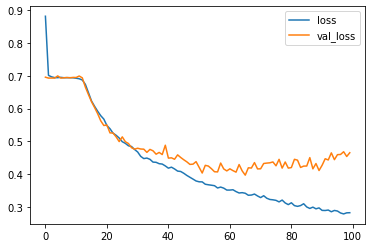

In [96]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

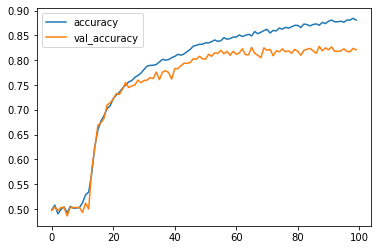

In [97]:
metrics[['accuracy','val_accuracy']].plot()

In [98]:
pred_result = model.predict(([inputs_test,ques_test]))

In [100]:
prediction = pred_result.argmax(axis=1)

In [101]:
prediction

array([33, 33,  2,  2,  2, 33, 33,  2, 33,  2,  2,  2,  2,  2,  2,  2,  2,
        2, 33,  2,  2, 33,  2, 33, 33,  2,  2, 33, 33,  2,  2,  2, 33,  2,
        2, 33,  2,  2,  2, 33,  2, 33, 33, 33,  2,  2,  2, 33,  2,  2,  2,
       33,  2,  2,  2, 33, 33,  2, 33, 33, 33, 33,  2, 33,  2,  2,  2, 33,
       33,  2, 33,  2, 33,  2,  2,  2,  2,  2, 33,  2,  2, 33,  2,  2, 33,
       33,  2, 33,  2,  2,  2, 33, 33, 33, 33,  2, 33,  2,  2, 33, 33, 33,
        2, 33, 33, 33, 33,  2, 33, 33, 33,  2,  2, 33,  2, 33,  2,  2,  2,
        2, 33,  2,  2, 33,  2, 33,  2, 33, 33, 33, 33,  2, 33,  2, 33, 33,
       33, 33, 33, 33, 33,  2, 33,  2,  2,  2, 33,  2, 33, 33,  2,  2, 33,
        2, 33, 33, 33, 33, 33,  2,  2,  2,  2,  2,  2, 33,  2, 33,  2, 33,
        2, 33, 33, 33,  2,  2,  2,  2, 33, 33,  2,  2,  2,  2, 33,  2,  2,
        2,  2, 33,  2, 33,  2,  2,  2,  2,  2, 33, 33, 33,  2,  2,  2,  2,
       33,  2,  2,  2,  2,  2,  2,  2, 33, 33, 33, 33,  2, 33, 33,  2,  2,
        2, 33,  2,  2,  2

In [103]:
answers = answers_test.argmax(axis=1)

In [105]:
from sklearn.metrics import classification_report

In [106]:
print(classification_report(answers,prediction))

              precision    recall  f1-score   support

           2       0.79      0.88      0.83       497
          33       0.86      0.76      0.81       503

    accuracy                           0.82      1000
   macro avg       0.83      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000



In [108]:
# Prediction on single data
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')